In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
USAhousing = pd.read_csv('USA_Housing.csv')

In [3]:
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df = USAhousing.iloc[:,:-1]

In [5]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [6]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()

In [7]:
scaled.fit(df.drop('Price',axis=1))
scaled_features = scaled.transform(df.drop('Price',axis=1))

In [8]:
df_feat = pd.DataFrame(data=scaled_features,columns=df.columns[:-1])

In [9]:
df_feat.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,1.028660,-0.296927,0.021274,0.088062,-1.317599
1,1.000808,0.025902,-0.255506,-0.722301,0.403999
2,-0.684629,-0.112303,1.516243,0.930840,0.072410
3,-0.491499,1.221572,-1.393077,-0.584540,-0.186734
4,-0.807073,-0.944834,0.846742,0.201513,-0.988387


In [10]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [13]:
X = df_feat
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [14]:
rf = XGBRegressor()

In [15]:
rf.fit(X_train,y_train)

C:\Users\Anshul\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:33:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [16]:
rf_predict = rf.predict(X_test)

In [17]:
print("MAE",metrics.mean_absolute_error(y_test,rf_predict))
print("MSE",metrics.mean_squared_error(y_test,rf_predict))

MAE 89276.80455099368
MSE 12508915624.27089


In [18]:
rf.score(X_train,y_train)

0.9309239278352612

C:\Users\Anshul\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


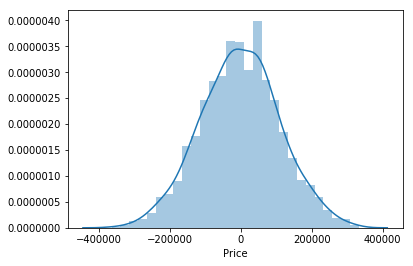

In [19]:
sns.distplot((y_test-rf_predict))